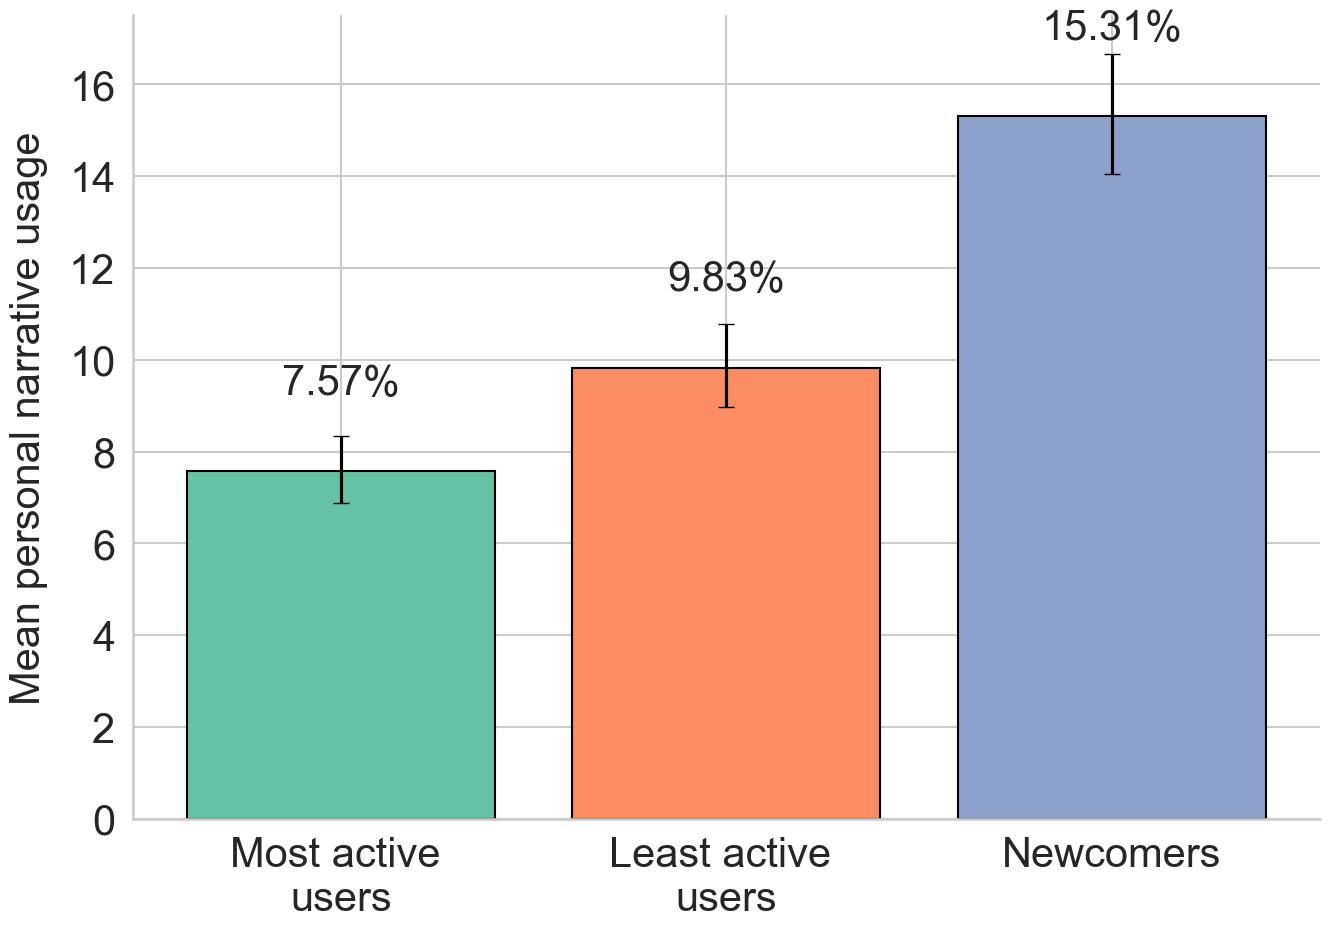

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
user_groups = ['Most active \nusers', 'Least active \nusers', 'Newcomers']
probabilities = [7.57, 9.83, 15.31]
lower_ci = [6.88, 8.97, 14.05]
upper_ci = [8.33, 10.77, 16.67]

# Calculate error bars
error_bars_lower = [p - l for p, l in zip(probabilities, lower_ci)]
error_bars_upper = [u - p for u, p in zip(upper_ci, probabilities)]
error_bars = [error_bars_lower, error_bars_upper]

# Aesthetic settings
sns.set_style("whitegrid")
sns.set_context("talk")

# Set font sizes
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams['font.size'] = 30  # General font size
plt.rcParams["axes.labelsize"] = 30  # Axis labels
plt.rcParams["xtick.labelsize"] = 30  # X-axis tick labels
plt.rcParams["ytick.labelsize"] = 30  # Y-axis tick labels

fig, ax = plt.subplots(figsize=(14, 10))  # Larger figure size for clarity

x_positions = np.arange(len(user_groups))

# Choose a palette with as many colors as there are groups
colors = sns.color_palette("Set2", n_colors=len(user_groups))

# Plot each bar individually to specify distinct colors
for i, (group, val, c_lower, c_upper, col) in enumerate(zip(user_groups, probabilities, error_bars_lower, error_bars_upper, colors)):
    ax.bar(x_positions[i], val, 
           yerr=[[c_lower], [c_upper]],
           capsize=6,  # Larger cap size for better visibility
           edgecolor='black', 
           color=col)

# Set tick labels
ax.set_xticks(x_positions)
ax.set_xticklabels(user_groups)

ax.set_ylabel("Mean personal narrative usage", fontsize=30, labelpad=15)

# Annotate each bar with its value
for i, val in enumerate(probabilities):
    ax.text(x_positions[i], val + 1.5, 
            f"{val:.2f}%", ha='center', va='bottom', fontsize=30)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('h1.png', dpi=600)
plt.show()